# Heart Disease Prediction



# 1. Đọc bộ dữ liệu

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/cleveland.csv", header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


# 2. Explanatory Data Analysis

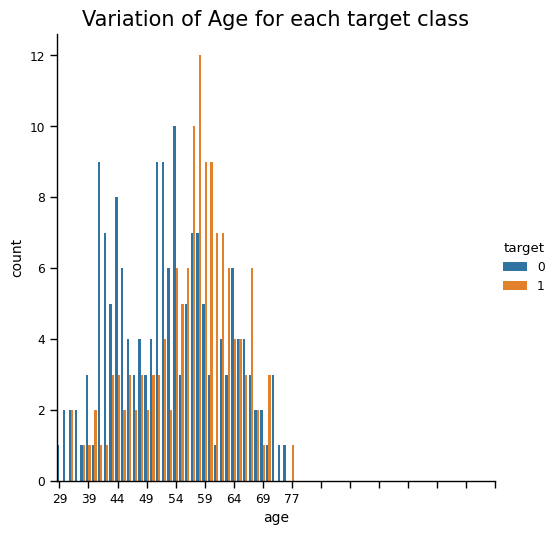

In [ ]:
#Bai tap 1
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restacg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

#distribution of target vs age
sns.set_context("paper", font_scale = 1,
                rc = {"font.size": 3, "axes.titlesize": 15, "axes.labelsize": 10})
ax = sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title('Variation of Age for each target class')
plt.show()

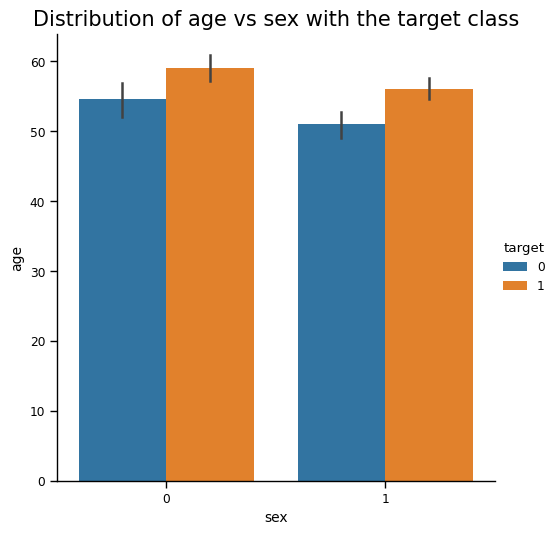

In [ ]:
#Bai tap 2
#Barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

# 3. K Nearest Neighbor

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
#define the model
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


# 4. SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


# 5. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))


Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


# 6. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train))
print('Accuracy for test set for Decision Tree = {}'.format(accuracy_for_test))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.74


# 7. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2,
                                    n_estimators=10, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))


Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


# 8. Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for Adaboost = {}'.format(accuracy_for_train))
print('Accuracy for test set for Adaboost = {}'.format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84


# 9. Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0,
                                        min_samples_split=2, max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for Gradient Boost = {}'.format(accuracy_for_train))
print('Accuracy for test set for Gradient Boost = {}'.format(accuracy_for_test))


Accuracy for training set for Gradient Boost = 1.0
Accuracy for test set for Gradient Boost = 0.85


# 10. XgBoost

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier(objective='binary:logistic', random_state=42, n_estimators=100)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for XgBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for XgBoost = {}'.format(accuracy_for_test))


Accuracy for training set for XgBoost = 1.0
Accuracy for test set for XgBoost = 0.87


# 11. Stacking

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(XGBClassifier)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel = 'rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

#list of (str, estimator)
clf = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('gc', gc), ('ad', ad), ('svc', svc)]

from sklearn.ensemble import StackingClassifier
xg = XGBClassifier()
classifier = StackingClassifier(estimators = clf, final_estimator = xg)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train))
print('Accuracy for test set of Stacking = {}'.format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:723: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (th


Accuracy for training set for Stacking = 0.92
Accuracy for test set of Stacking = 0.9
